In [ ]:
#   ------------------------------------
#   Libraries
#   ------------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as mcolors
from enum import Enum
import random
import math

#   For land/ocean coordinates identification
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import shapely.geometry as sgeom

#   For nice visualizations
import folium
import geopy.distance

In [ ]:
#   ------------------------------------
#   Weather Data
#   ------------------------------------
weather_df = pd.read_csv('hurricane_milton.csv')
weather_df['valid_time'] = pd.to_datetime(weather_df['valid_time'])

In [95]:
print(weather_df.shape)

(45936, 19)


In [3]:
weather_df

,valid_time,latitude,longitude,Dewpoint,Temperature,Mean Sea Level Pressure,Sea Surface Temperature,Surface Pressure,East Wind Speed,North Wind Speed,Convective Rain Rate,High Vegetation Cover,Low Vegetation Cover,Type of High Vegetation,Type of Low Vegetation,Geopotential,Total Precipitation,Convective Precipitation,Large Scale Precipitation
0,2024-10-09 00:00:00,32.0,-88.00,282.47168,23.69192,1011.61500,NaN,1004.5244,0.955292,-5.644577,0.0,0.988942,0.011058,3,1,594.201660,0.000000e+00,0.000000e+00,0.000000e+00
1,2024-10-09 00:00:00,32.0,-87.75,283.12988,23.69192,1011.46250,NaN,1003.0244,1.092987,-5.639694,0.0,0.992065,0.005601,3,0,708.604000,0.000000e+00,0.000000e+00,0.000000e+00
2,2024-10-09 00:00:00,32.0,-87.50,282.69043,24.45950,1011.27000,NaN,1003.5944,0.744354,-5.595749,0.0,0.947906,0.048926,3,1,644.979000,0.000000e+00,0.000000e+00,0.000000e+00
3,2024-10-09 00:00:00,32.0,-87.25,282.68457,24.86184,1011.13250,NaN,1003.2744,-0.144318,-5.181686,0.0,0.947906,0.048926,3,1,660.783700,0.000000e+00,0.000000e+00,0.000000e+00
4,2024-10-09 00:00:00,32.0,-87.00,282.98730,24.73293,1011.07500,NaN,1001.6144,-1.456818,-4.544968,0.0,0.981760,0.018240,3,1,796.740700,0.000000e+00,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45931,2024-10-10 23:00:00,25.0,-81.00,295.67260,27.34194,1010.32625,28.36562,1010.2000,4.981674,-2.966354,0.0,0.000000,0.000000,0,0,10.318848,0.000000e+00,0.000000e+00,0.000000e+00
45932,2024-10-10 23:00:00,25.0,-80.75,295.82886,27.45522,1010.24125,28.62832,1010.1400,5.660385,-2.168503,0.0,0.000000,0.000000,0,13,8.033691,0.000000e+00,0.000000e+00,0.000000e+00
45933,2024-10-10 23:00:00,25.0,-80.50,295.91090,27.64468,1010.17125,29.07460,1010.0800,6.438705,-1.749558,0.0,0.000000,0.000000,0,0,7.826660,0.000000e+00,0.000000e+00,0.000000e+00
45934,2024-10-10 23:00:00,25.0,-80.25,296.15503,27.96304,1010.08375,29.28848,1010.0600,7.008041,-1.525925,0.0,0.000000,0.000000,0,0,2.369629,9.540000e-07,2.380000e-07,9.540000e-07


In [96]:
# Filtering rows where 'timestamp' is equal to row with lowest pressure in data
initial_weather_df = weather_df[weather_df['valid_time'] == pd.Timestamp('2024-10-10 00:00:00')]
initial_weather_df.shape

(957, 19)

In [97]:
initial_weather_df.head()

,valid_time,latitude,longitude,Dewpoint,Temperature,Mean Sea Level Pressure,Sea Surface Temperature,Surface Pressure,East Wind Speed,North Wind Speed,Convective Rain Rate,High Vegetation Cover,Low Vegetation Cover,Type of High Vegetation,Type of Low Vegetation,Geopotential,Total Precipitation,Convective Precipitation,Large Scale Precipitation
22968,2024-10-10,32.0,-88.00,288.52637,25.77700,1011.94875,NaN,1004.87125,0.081940,-6.468918,0.0,0.988942,0.011058,3,1,594.20166,0.0,0.0,0.0
22969,2024-10-10,32.0,-87.75,288.57910,25.29067,1011.77875,NaN,1003.35125,-1.102631,-6.047043,0.0,0.992065,0.005601,3,0,708.60400,0.0,0.0,0.0
22970,2024-10-10,32.0,-87.50,288.13574,25.56410,1011.59875,NaN,1003.93125,-2.016693,-5.554855,0.0,0.947906,0.048926,3,1,644.97900,0.0,0.0,0.0
22971,2024-10-10,32.0,-87.25,287.86230,25.67544,1011.51125,NaN,1003.66125,-2.847748,-5.037277,0.0,0.947906,0.048926,3,1,660.78370,0.0,0.0,0.0
22972,2024-10-10,32.0,-87.00,287.87012,25.43910,1011.48625,NaN,1002.02125,-3.415131,-4.591965,0.0,0.981760,0.018240,3,1,796.74070,0.0,0.0,0.0


In [ ]:
#   ------------------------------------
#   Enumerators
#   ------------------------------------
class TemperatureFactor(Enum):
    """Using constants for now, needs to be calculated somehow."""
    OCEAN_HEATING = 0.1     # Heating factor for cells over the ocean
    OCEAN_COOLING = 0.1
    LAND_HEATING = 0.5
    LAND_COOLING = 0.5      # Cooling factor for cells over land

    @classmethod
    def apply_wind_factor(cls, total_wind_speed, k=0.05):
        """
        Dictionary of temperature change factors adjusted based on given total wind speed.
        Using linear scaling for simplicity.
        :param total_wind_speed: The total wind speed affecting temperature change.
        :param k: A scaling constant that determines how much wind increases cooling.
        :return: A dictionary with adjusted factors.
        """
        if total_wind_speed is None or math.isnan(total_wind_speed):
            #  Return the original enumerator if no valid wind speed is provided
            return {
                cls.OCEAN_HEATING: cls.OCEAN_HEATING.value,
                cls.OCEAN_COOLING: cls.OCEAN_COOLING.value,
                cls.LAND_HEATING: cls.LAND_HEATING.value,
                cls.LAND_COOLING: cls.LAND_COOLING.value,
            }
        
        wind_factor = 1 + k * total_wind_speed  # Linear scaling

        return {
            cls.OCEAN_HEATING: cls.OCEAN_HEATING.value * wind_factor,
            cls.OCEAN_COOLING: cls.OCEAN_COOLING.value * wind_factor,
            cls.LAND_HEATING: cls.LAND_HEATING.value * wind_factor,
            cls.LAND_COOLING: cls.LAND_COOLING.value * wind_factor,
        }

In [ ]:
#   ------------------------------------
#   Functions
#   ------------------------------------

# Function to check if a point is ocean or land
def is_ocean_cell(lat, lon):
    """Check if given lat/long coordinates correspond to a cell over land or ocean."""
    # Create a Shapely Point object for the given coordinates
    point = sgeom.Point(lon, lat)
    
    # Use Cartopy to add land and ocean features
    land = cfeature.LAND
    ocean = cfeature.OCEAN

    # Loop through features and check if the point is inside the geometry
    for feature in [land, ocean]:
        # Cartopy features are available through cartopy.feature
        for geom in feature.geometries():
            if geom.contains(point):
                if feature == land:
                    return False  # The point is on land
                elif feature == ocean:
                    return True  # The point is in the ocean

    return False  # Default return if no match

def determine_grid_size(df, target_density=1.0):
    """
    Determines an appropriate grid size based on the number of data points.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing 'latitude' and 'longitude' columns.
        target_density (float): Approximate number of data points per grid cell (default 1.0).
    
    Returns:
        int: Optimal grid size (number of cells along one axis).
    """
    num_points = len(df)
    grid_size = int(np.sqrt(num_points / target_density))  # Approximate square grid
    
    return max(grid_size, 10)  # Ensure a minimum grid size

<h2>Initial Assumptions</h2>

<dl>
  <dt><strong>Area of simulation</strong></dt>
  <dd>- ERA5 data has a spatial resolution of 31km</dd>
  <dd>- Based on this resolution, consider each cell to be a square area of 19 miles (about 30.6km).</dd>
  <dd>- This means each cell interacts with its neighbors within a 19 mile radius.</dd>  
  <dd>- The grid size can be calculated by using the <strong>determine_grid_size</strong> method, which returned a possible grid size of 30x30 for hurricane Milton dataset.</dd>
  <dd>- Typical hurricanes are about 300 miles wide and the eye is aproximately 20-40 miles.</dd>
  <dd>- For the purpose of this model we will assume the eye will be about the size of a cell.</dd>
  <dt><strong>Key Parameters</strong></dt>
  <dd>- <strong>Sea Surface Temperature</strong>.  Needs to be 27C <= SST <= 30 on 50% - 70% of cells considered "over the ocean" for a hurricane to form.</dd>
  <dd>- <strong>Cooling Factor</strong>.  This is to control how quickly the storm weakens over land.  Typical range 0.05 - 1.  Often depends on size of the storm, speed and terrain.  Can be estimated with historical data (linear regression model using variables such as storm speed, terrain, and storm size).  For simplicity we use 0.05 for cells over the ocean (less cooling), and 0.1 for cells over land.  </dd>
  <dd>- <strong>Atmospheric Pressure</strong>.  Needs to be ~950 hPa or lower in the cell that represents the eye, and higher ouside the storm area (~1010 hPa).</dd>
  <dd>- <strong>Wind Speed and Direction</strong>.</dd>
  <dd>- <strong>Humidity</strong>.  High humidity over the ocean (~80% or more), lower inland.</dd>  
  <dd>- <strong>Precipitation.</strong></dd>
  <dd>- <strong>Terrain over land</strong>. Reduces wind speed over land due to friction.  For this simulation a friction factor is needed.
  <br>  Topography is involved, with mountains and elevations cause 'orographic lifting' affecting the clouds and causing rapid cooling and precipitation.  Urban areas can have localized effects such as the urban heat island effect.  Cities may be slightly warmer than surrounding rural areas which can provide some temporary energy to the storm but not enough to maintain it.</dd>  
</dl>


In [ ]:
#   ------------------------------------
#   Classes
#   ------------------------------------
class MapGridCell:
    """Represents a single cell in the grid, which holds weather information at a
    specific time and date for a square sized area within Florida."""
    def __init__(self, is_ocean, latitude, longitude):
        self.latitude = latitude
        self.longitude = longitude
        self.is_ocean = is_ocean
        self.radius_miles = 19
        self.temperature = np.nan
        self.pressure = np.nan
        self.dewpoint = np.nan
        self.windspeednorth = np.nan
        self.windspeedeast = np.nan
        self.totalwindspeed = np.nan
        self.humidity = np.nan

    def update_temperature(self, neighbors):
        #   Get temperature factors adjusted based on wind speed
        #   Basic Rule 1:  Wind speed and direction affect how temperature is transferred
        #   from one cell to another.  For simplicity, we will just consider increasing the
        #   heating/cooling factor with the total wind speed.  Meaning that the stronger
        #   the winds, the greater the influence of neighboring cells in the current cell's
        #   temperature changes.
        temp_factors = TemperatureFactor.apply_wind_factor(self.totalwindspeed)
        OCEAN_HEATING = temp_factors[TemperatureFactor.OCEAN_HEATING]
        LAND_HEATING = temp_factors[TemperatureFactor.LAND_HEATING]
        OCEAN_COOLING = temp_factors[TemperatureFactor.OCEAN_COOLING]
        LAND_COOLING = temp_factors[TemperatureFactor.LAND_COOLING]

        #   Calculate average temperature of neighbors
        avg_temp = np.mean([cell.temperature for cell in neighbors])
        #   Calculate average temperature of neighbors
        avg_pressure = np.mean([cell.pressure for cell in neighbors])
        #   Calculate average temperature of neighbors
        avg_humidity = np.mean([cell.humidity for cell in neighbors])

        # CHANGES BASED ON OTHER TEMPERATURES AROUND
        # ------------------------------------------  
        # Update the temperature by comparing current cell's value
        # with the average of neighbors
        if self.temperature < avg_temp:
            #   Apply heating factor based on cell being over the ocean or land
            #   Basic Rule 2:  If average temperature of neighbor cells is greater, the current cell
            #   can absorb heat and warm up.
            self.temperature = self.temperature + OCEAN_HEATING if self.is_ocean else self.temperature + LAND_HEATING
        elif self.temperature > avg_temp:
            #   Apply cooling factor based on cell being over the ocean or land
            #   Basic Rule 3:  If average temperature of neighbor cells is cooler, temperature
            #   should decrease.
            self.temperature = self.temperature - OCEAN_COOLING if self.is_ocean else self.temperature - LAND_COOLING
        #   For now, do not change temperature if average is the same            

        # CHANGES BASED ON PRESSURE
        # -------------------------
        if self.pressure < avg_pressure:
            #   Apply same heating factor for now
            #   Basic Rule 4:  If average pressure of neighbor cells is greater, temperature
            #   should increase.  This is because the lower pressure might indicate rising warm
            #   air.
            self.temperature = self.temperature + OCEAN_HEATING if self.is_ocean else self.temperature + LAND_HEATING
        elif self.pressure > avg_pressure:
            #   Apply cooling factor for now
            #   Basic Rule 5:  If average pressure of neighbor cells is lower, temperature
            #   should decrease since higher pressure in current cell might indicate descending cool air.
            self.temperature = self.temperature - OCEAN_COOLING if self.is_ocean else self.temperature - LAND_COOLING
        #   For now, do not change temperature if average is the same    

        # CHANGES BASED ON HUMIDITY
        # -------------------------
        if self.humidity > avg_humidity:
            #   Apply same heating factor for now
            #   Basic Rule 6:  If the humidity of the current cell is higher than the average neighbor humidity, temperature
            #   may increase because of the moisture's heat-retaining properties.
            self.temperature = self.temperature + OCEAN_HEATING if self.is_ocean else self.temperature + LAND_HEATING
        elif self.humidity < avg_humidity:
            #   Apply cooling factor for now
            #   Basic Rule 7:  If the humidity of the current cell is lower than the average neighbor humidity, temperature
            #   may decrease simulating the cooler, drier air conditions.
            self.temperature = self.temperature - OCEAN_COOLING if self.is_ocean else self.temperature - LAND_COOLING
        #   For now, do not change temperature if average is the same
  
    def update_wind_speed(self, neighbors):
        raise NotImplementedError("This method - update_wind_speed - has not been implemented yet.")

    def update_pressure(self, neighbors):
        raise NotImplementedError("This method - update_pressure - has not been implemented yet.")

    def update_humidity(self, neighbors):
        raise NotImplementedError("This method - update_humidity - has not been implemented yet.")

    def update_precipitation(self, neighbors):
        raise NotImplementedError("This method - update_precipitation - has not been implemented yet.")

    def area_covered(self):
        # Add logic here to calculate the area covered by the cell
        # based on the latitude, longitude, and radius.
        return f"Square area within a {self.radius_miles}-mile range of ({self.latitude}, {self.longitude})"
    
    def __repr__(self):
        """String representation of MapGridCell"""
        return f"MapGridCell(latitude={self.latitude}, longitude={self.longitude}, radius={self.radius_miles} miles, is_ocean={self.is_ocean}, sst={self.sst}, lst={self.lst})"

class MapGrid:
    """Manages the grid and initialization from data."""
    def __init__(self, size=30):
        self.size = size
        self.grid = [[MapGridCell(np.nan,np.nan,np.nan) for _ in range(size)] for _ in range(size)]
        self.lat_bins = None
        self.lon_bins = None
        self.df = pd.DataFrame()  
    
    def initialize_grid(self, df):
        """Maps lat/lon data to the automaton grid, storing real-world coordinates in cells."""

        self.df = df.copy()

        # Define lat/lon bin edges
        lat_min, lat_max = df["latitude"].min(), df["latitude"].max()
        lon_min, lon_max = df["longitude"].min(), df["longitude"].max()

        self.lat_bins = np.linspace(lat_min, lat_max, self.size + 1)  # +1 to avoid index issues
        self.lon_bins = np.linspace(lon_min, lon_max, self.size + 1)

        # Compute lat/lon center points for each grid cell
        lat_centers = (self.lat_bins[:-1] + self.lat_bins[1:]) / 2
        lon_centers = (self.lon_bins[:-1] + self.lon_bins[1:]) / 2

        # Initialize grid with empty cells
        for i in range(self.size):
            for j in range(self.size):
                self.grid[i][j] = MapGridCell(is_ocean_cell(lat_centers[i],lon_centers[j]), latitude=lat_centers[i], longitude=lon_centers[j])

        # Assign data points to grid cells
        df["lat_idx"] = np.digitize(df["latitude"], self.lat_bins) - 1
        df["lon_idx"] = np.digitize(df["longitude"], self.lon_bins) - 1

        # Populate grid with data
        for _, row in df.iterrows():
            lat_idx, lon_idx = row["lat_idx"], row["lon_idx"]
            if 0 <= lat_idx < self.size and 0 <= lon_idx < self.size:
                self.grid[lat_idx][lon_idx].temperature = row["Temperature"]
                self.grid[lat_idx][lon_idx].dewpoint = row["Dewpoint"]
                pressure_value = row["Mean Sea Level Pressure"] if pd.notnull(row["Mean Sea Level Pressure"]) else row["Surface Pressure"]
                self.grid[lat_idx][lon_idx].pressure = pressure_value
                self.grid[lat_idx][lon_idx].windspeednorth = row["North Wind Speed"]
                self.grid[lat_idx][lon_idx].windspeedeast = row["East Wind Speed"]
                self.grid[lat_idx][lon_idx].totalwindspeed = row["Total Wind Speed"]

        # Handle empty cells by filling with the mean temperature
        mean_temp = np.nanmean(df["Temperature"])
        for i in range(self.size):
            for j in range(self.size):
                if np.isnan(self.grid[i][j].temperature):
                    self.grid[i][j].temperature = mean_temp

        #   Return updated initial data frame
        return df

    def get_neighbors(self, i, j):
        """ Get the closest neighbors in a 3x3 square around a cell.
            Including the cell itself for now."""
        neighbors = []
        for x in range(i-1, i+2):
            for y in range(j-1, j+2):
                if 0 <= x < self.size and 0 <= y < self.size:
                    cell = self.grid[x][y]
                    neighbors.append(cell)
        return neighbors
    
    def update_grid(self):
        # Update the grid's temperatures only
        new_grid = np.copy(self.grid)
        for i in range(self.size):
            for j in range(self.size):
                neighbors = self.get_neighbors(i, j)
                new_grid[i][j].update_temperature(neighbors)        
        self.grid = new_grid
    
    def simulate_step(self):
        try:
            # Run simulation by updating all the states
            new_grid = np.copy(self.grid)
            for i in range(self.size):
                for j in range(self.size):
                    neighbors = self.get_neighbors(i, j)
                    #   Run all updates
                    new_grid[i][j].update_temperature(neighbors)
                    new_grid[i][j].update_wind_speed(neighbors)
                    new_grid[i][j].update_pressure(neighbors)
                    new_grid[i][j].update_humidity(neighbors)
                    new_grid[i][j].update_precipitation(neighbors)
        except NotImplementedError as e:
            # Show us unimplemented methods
            print(f"Error: {e}")

        #   TODO:  Do not replace previous grid, to keep track of whole simulation
        self.grid = new_grid

    def get_grid_data(self):
        # Return the grid data for visualization (temperatures only)
        return np.array([[cell.temperature for cell in row] for row in self.grid])

    def visualize(self):
        """Displays the temperature grid."""
        temp_grid = np.array([[cell.temperature for cell in row] for row in self.grid])

        plt.imshow(temp_grid, cmap="coolwarm", origin="lower")
        plt.colorbar(label="Temperature (°C)")
        plt.title("Initial Temperature Grid")
        plt.show()
    
    def generate_folium_map(self):
        """Generates a Folium map with grid overlay."""
        # Initialize Folium map at the center of Florida
        map_center = [np.mean(self.lat_bins), np.mean(self.lon_bins)]
        florida_map = folium.Map(location=map_center, zoom_start=6)

        # Get temperature range for color mapping
        temp_values = [cell.temperature for row in self.grid for cell in row]
        norm = mcolors.Normalize(vmin=min(temp_values), vmax=max(temp_values))
        colormap = mcolors.LinearSegmentedColormap.from_list("temp_colormap", ["blue", "yellow", "red"])

        # Add grid rectangles to the map
        for i in range(self.size):
            for j in range(self.size):
                cell = self.grid[i][j]
                color = mcolors.to_hex(colormap(norm(cell.temperature)))

                folium.Rectangle(
                    bounds=[
                        [self.lat_bins[i], self.lon_bins[j]],  # Bottom-left corner
                        [self.lat_bins[i+1], self.lon_bins[j+1]]  # Top-right corner
                    ],
                    color=color,
                    fill=True,
                    fill_color=color,
                    fill_opacity=0.3,
                    popup=folium.Popup(
                        f"<b>Grid Position:</b> {i},{j}<br>"
                        f"<b>Is Over Ocean?:</b> {cell.is_ocean}<br>"
                        f"<b>East Wind Speed:</b> {cell.windspeedeast} mph<br>"
                        f"<b>North Wind Speed:</b> {cell.windspeednorth} mph<br>"
                        f"<b>Total Wind Speed:</b> {cell.totalwindspeed} mph<br>"
                        f"<b>Pressure:</b> {cell.pressure} mb<br>"
                        f"<b>Temperature:</b> {cell.temperature}°C<br>"
                        f"<b>Dewpoint:</b> {cell.dewpoint}%",
                        max_width=300
                    ),
                ).add_to(florida_map)

        return florida_map

    def __repr__(self):
        """String representation of MapGrid"""
        return f"MapGrid(Grid Size={self.size})"

<h1>Temperature Rules</h1>

<ol>
  <li><strong>Heating/Cooling Factor<br></strong>
    Better factors could be calculated using historical data.  For the purpose of this simulation we will be using constants based on the following rules.
    <ol>
      <li>Oceans heat up and cool down slower compared to land, so heating and cooling factors should be moderate as in 0.02 to 0.05.</li>
      <li>Land heating/cooling factors should be 0.1 to 0.2 because land cells respond faster to surrounding temperature changes.</li>
    </ol>
  </li>
  <li><strong>Effect of wind<br></strong>
    Wind speed and direction affect how temperature is carried from one cell to another.
    <ol>
      <li>Stronger winds could lead to more rapid temperature equalization across the grid.</li>
      <li>weaker winds might allow for localized temperature variations to persist.</li>
    </ol>
    For simplicity, we will assume that the stronger the wind, the greater the influence of the state of other cells in temperature changes.  This is by increasing the cooling/heating factors based on the wind speed, using a simple linear function for scaling.
  </li>
  <li><strong>Effect of temperature<br></strong>
    <ol>
      <li>If most neighbors are cooler, it loses heat (cooling factor applies based on cell being over land or over the ocean).</li>
      <li>If neighboring cells have high temperatures, the current cell can absorb heat and warm up.</li>
    </ol>
  </li>
  <li><strong>Effect of pressure<br></strong>
    <ol>
      <li>If the pressure in the current cell is lower than the average pressure of its neighbors, the current cell's temperature can increase (since the lower pressure might indicate rising warm air).</li>
      <li>If the pressure in the current cell is higher than the average pressure of its neighbors, the current cell's temperature can decrease (since the higher pressure might indicate descending cool air).</li>
    </ol>
  </li>
  <li><strong>Effect of humidity<br></strong>
    <ol>
      <li>If the current humidity is higher than the average neighbor humidity, the current temperature may increase due to moisture’s heat-retaining properties.</li>
      <li>If the current humidity is lower than the average neighbor humidity, the current temperature may decrease, simulating the cooler, drier air conditions.</li>
    </ol>
  </li>
  <li><strong>Effect of Precipitation<br></strong>
    <ol>
      <li><strong>TO BE DETERMINED</strong></li>
    </ol>
  </li>
  <li><strong>Effect of Terrain<br></strong>
    <ol>
      <li><strong>TO BE DETERMINED</strong></li>
    </ol>
  </li>
</ol>	

C:\Users\damia\AppData\Local\Temp\ipykernel_12740\3941212259.py:109: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lat_idx"] = np.digitize(df["latitude"], self.lat_bins) - 1
C:\Users\damia\AppData\Local\Temp\ipykernel_12740\3941212259.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["lon_idx"] = np.digitize(df["longitude"], self.lon_bins) - 1


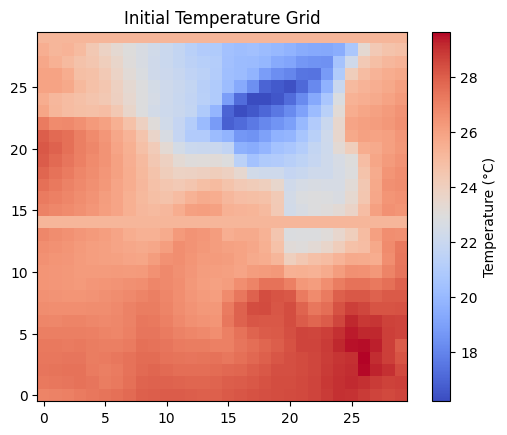

In [ ]:
#   Initialize the grid with hurricane Milton and display a grid with initial state
ca = MapGrid(size=30)
initial_weather_df = ca.initialize_grid(initial_weather_df)
#   Currently this method is only showing temperature
ca.visualize()

In [ ]:
#   Currently looking at temperature changes by running this cell multiple times
ca.update_grid()
ca.visualize()

In [102]:
florida_map = ca.generate_folium_map()
florida_map.save("florida_temperature_map.html")  # Save to an HTML file

<h2>Simulation</h2>


In [ ]:
#   Run simulation with all updates and visualize the change
#   This will be only one step
ca.simulate_step()
ca.visualize()